In [29]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [30]:
reddit_args = pickle.load(open('full_results_reddit_args.pkl', mode='rb'))
wiki_args = pickle.load(open('full_results_wiki_args.pkl', mode='rb'))

In [31]:
reddit_reg = pickle.load(open('full_results_reddit_reg.pkl', mode='rb'))
reddit_reg = pickle.load(open('full_results_wiki_reg.pkl', mode='rb'))

In [32]:
'''
    Assumes the converation will only have two speakers

    ~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~
        > conv - entire conversation object
        > print_output - whether to print medial variables
    ~~~~~~~~~~~~ RETURNS ~~~~~~~~~~~~
        > C - dictionary with following key value pairs
            convID : ID of conversation
            a : ID of speaker a
            b : ID of speaker b
            num_response_b_a : number of responses from b to a
            num_response_a_b : number of responses from a to b
            C_b_a : dictrionary of asymmetric accomodation from speaker b to speaker a
            C_a_b : dictionary of asymmetric accomodation from speaker a to speaker b
            LSM : dictionary of symmetric accomodation between both speakers
            mean_C_b_a : average accomodation from b towards a across valid markers
            mean_C_a_b : average accomodation from a towards b across valid markers
            mean_LSM : average of symmetric accommodation
            valid_markers : list of valid markers
            
            
Questions we want to ask: When there is accommodation from one to another, what are the values in C_b_a, C_a_b, LSM? 
What kinds of cues are getting "high values?"

Strategy:
use the symmetric measure; relate the accomodation value for an element to the output mean_LSM... what does this do?

the question is - what is driving high LSM vals?

    '''

'\n    Assumes the converation will only have two speakers\n\n    ~~~~~~~~~~~ ARGUMENTS ~~~~~~~~~~~\n        > conv - entire conversation object\n        > print_output - whether to print medial variables\n    ~~~~~~~~~~~~ RETURNS ~~~~~~~~~~~~\n        > C - dictionary with following key value pairs\n            convID : ID of conversation\n            a : ID of speaker a\n            b : ID of speaker b\n            num_response_b_a : number of responses from b to a\n            num_response_a_b : number of responses from a to b\n            C_b_a : dictrionary of asymmetric accomodation from speaker b to speaker a\n            C_a_b : dictionary of asymmetric accomodation from speaker a to speaker b\n            LSM : dictionary of symmetric accomodation between both speakers\n            mean_C_b_a : average accomodation from b towards a across valid markers\n            mean_C_a_b : average accomodation from a towards b across valid markers\n            mean_LSM : average of symmet

In [33]:
reddit_args[0]['C_a_b']

{'O': 0.0,
 'V': 0.0,
 'R': 0.0,
 '!': 0.6666666666666667,
 'P': 0.0,
 '&': 0.0,
 'E': None,
 ',': 0.0,
 'ipron': 0.0,
 'article': 0.0,
 'negate': 0.0,
 'quant': 0.0}

In [34]:
len(sorted_by_accom)

1215

In [35]:
# we want to see for a given accommodation value, what elements are driving it?
# for each convo, construct a "difference from mean"
# plot the histogram of "difference from mean" values, for high accommodation elements.

sorted_by_accom = sorted(reddit_args, key= lambda x: x['mean_C_a_b'], reverse=True)
top100 = sorted_by_accom[:300]

taglist = ['O', 'V', 'R', '!', 'P', '&', 'E', ',', 'ipron', 'article', 'negate', 'quant']
tagdeviancedict = {t:[] for t in taglist}

for i, tag in enumerate(taglist):
    for convo in top100:
        try:
            tagdeviancedict[tag].append(convo['C_a_b'][tag] - convo['mean_C_a_b'])
        except Exception as e:
            continue
        

In [36]:
wordlist = ['Personal Pronoun', 'Auxiliary Verb', 'Adverb', 'Interjection (ARK specific)', 'Preposition', 'Conjunction', 'Emoticon (ARK specific)', 'Punctuation (ARK specific)', 'Impersonal Pronoun', 'Article', 'Negation', 'Quantifier']

In [37]:
tagdict = dict(zip(taglist, wordlist))

In [38]:
# f, axs = plt.subplots(12, 1, figsize=(8, 75))
i=0
for tag, vals in tagdeviancedict.items():
    plt.hist(vals, bins=20, range=(-1, 1))
    plt.title(tagdict[tag])
    plt.savefig(str(i) + '.png')
    i+=1
    plt.close()

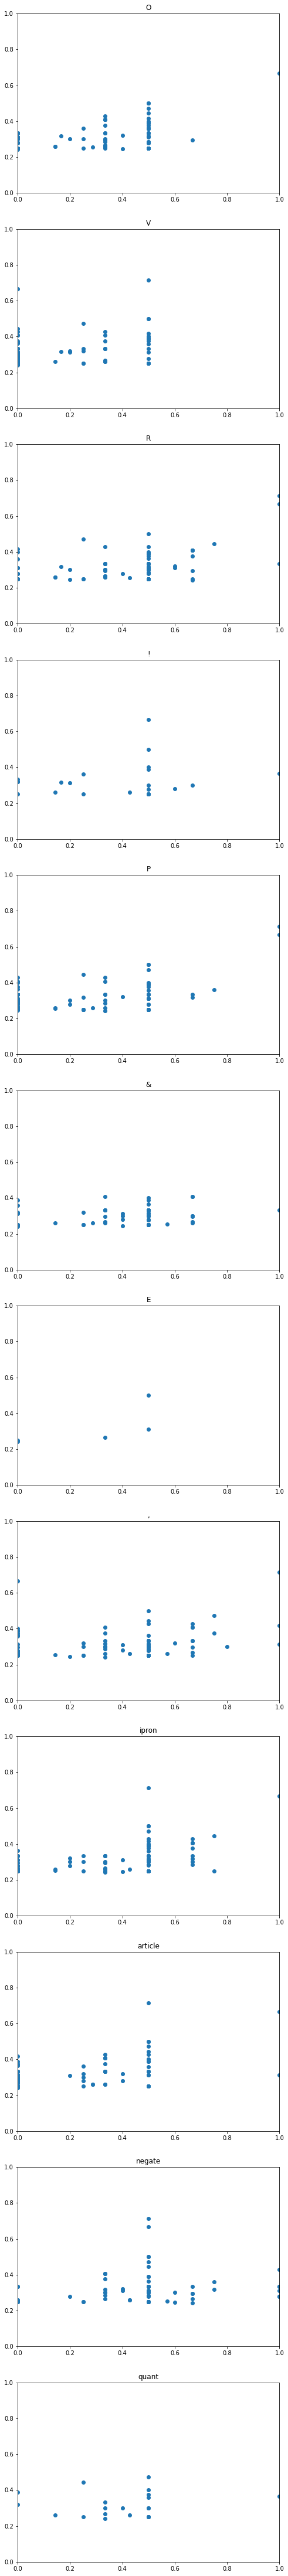

In [28]:
f, axs = plt.subplots(12, 1, figsize=(8, 80))
for i, tag in enumerate(['O', 'V', 'R', '!', 'P', '&', 'E', ',', 'ipron', 'article', 'negate', 'quant']):
    tag_vals = []
    LSM_vals = []
    for result in top100:
        tag_vals.append(result['C_a_b'][tag])
        LSM_vals.append(result['mean_C_a_b'])
        
    axs[i].scatter(tag_vals, LSM_vals)
    axs[i].set_title(tag)
    axs[i].set_xlim([0, 1])
    axs[i].set_ylim([0, 1])

plt.show()

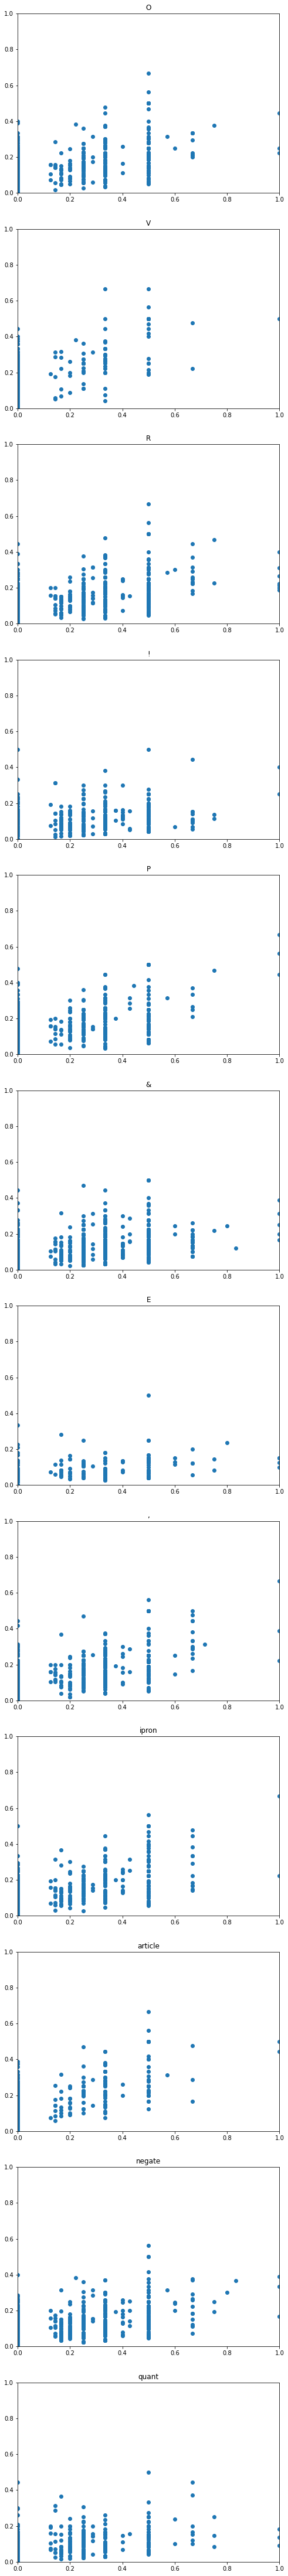

In [7]:

f, axs = plt.subplots(12, 1, figsize=(8, 80))
for i, tag in enumerate(['O', 'V', 'R', '!', 'P', '&', 'E', ',', 'ipron', 'article', 'negate', 'quant']):
    tag_vals = []
    LSM_vals = []
    for result in reddit_args:
        tag_vals.append(result['C_b_a'][tag])
        LSM_vals.append(result['mean_C_b_a'])
        
    axs[i].scatter(tag_vals, LSM_vals)
    axs[i].set_title(tag)
    axs[i].set_xlim([0, 1])
    axs[i].set_ylim([0, 1])

plt.show()

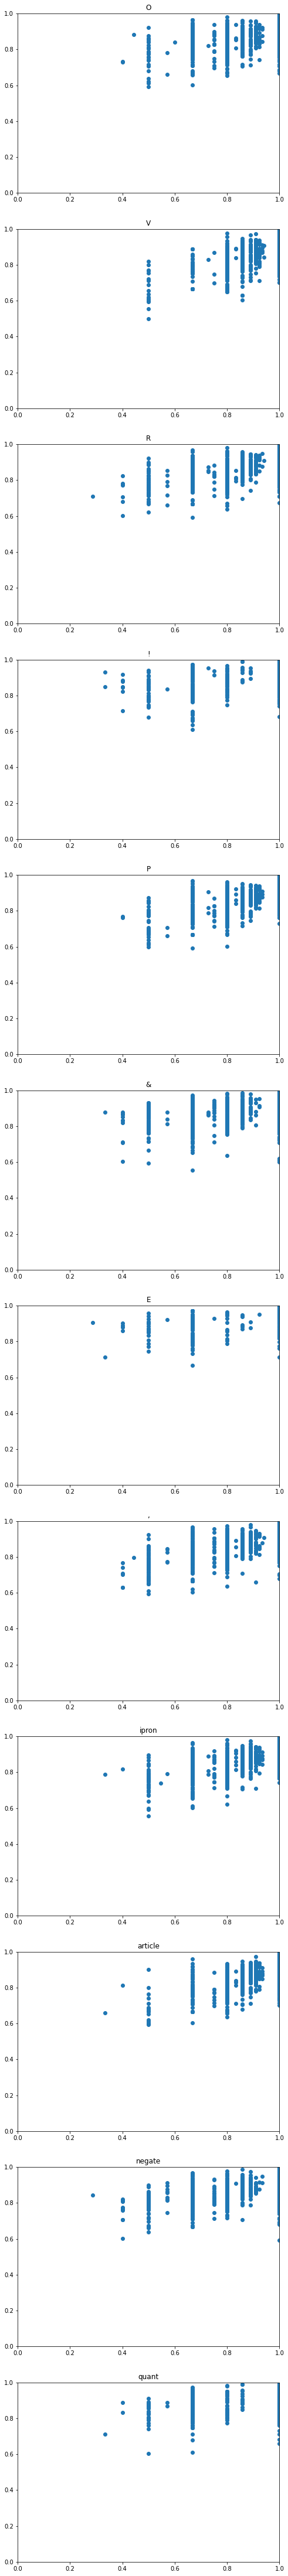

In [8]:

f, axs = plt.subplots(12, 1, figsize=(8, 80))
for i, tag in enumerate(['O', 'V', 'R', '!', 'P', '&', 'E', ',', 'ipron', 'article', 'negate', 'quant']):
    tag_vals = []
    LSM_vals = []
    for result in reddit_args:
        tag_vals.append(result['LSM'][tag])
        LSM_vals.append(result['mean_LSM'])
        
    axs[i].scatter(tag_vals, LSM_vals)
    axs[i].set_title(tag)
    axs[i].set_xlim([0, 1])
    axs[i].set_ylim([0, 1])

plt.show()
    

In [ ]:
# generally, we want to... show 

In [4]:
reddit_args[0]

{'convID': 'cur1eqa',
 'a': 'championofobscurity',
 'b': 'pm_me_taylorswift',
 'num_response_b_a': 4,
 'num_response_a_b': 3,
 'C_b_a': {'O': 0.0,
  'V': 0.0,
  'R': 0.0,
  '!': 0.6666666666666667,
  'P': 0.0,
  '&': 0.0,
  'E': None,
  ',': 0.0,
  'ipron': 0.0,
  'article': None,
  'negate': None,
  'quant': None},
 'C_a_b': {'O': 0.0,
  'V': 0.0,
  'R': 0.0,
  '!': 0.0,
  'P': 0.0,
  '&': 0.25,
  'E': None,
  ',': 0.0,
  'ipron': 0.0,
  'article': None,
  'negate': None,
  'quant': None},
 'LSM': {'O': 0.8571448979300296,
  'V': 0.8571448979300296,
  'R': 0.8571448979300296,
  '!': 0.5000124996875077,
  'P': 0.8571448979300296,
  '&': 0.8571448979300296,
  'E': None,
  ',': 0.8571448979300296,
  'ipron': 0.8571448979300296,
  'article': None,
  'negate': None,
  'quant': None},
 'mean_C_b_a': 0.08333333333333334,
 'mean_C_a_b': 0.03125,
 'mean_LSM': 0.8125033481497144,
 'valid_markers': ['O', 'V', 'R', '!', 'P', '&', ',', 'ipron']}